In [3]:
# !pip install pycaret

In [1]:
# !pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [15]:
data_directory = "/usr/local/google/home/lavinigam/Documents/projects/mlops/mlops-upgrad/mlops-upgrad/data/raw/data/"

In [16]:
import pandas as pd
dataset = pd.read_csv(data_directory+"members_v01_sample_joinfinal_afterfeatures.csv")
dataset.drop('Unnamed: 0',axis=1,inplace=True)
dataset.shape

(3032, 26)

In [17]:
dataset.head()

,msno,city,bd,gender,registered_via,total_transactions,total_activity,time_on_platform_months,is_churn,num_25,...,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,discount,is_discount,amt_per_day,membership_duration
0,MhdcuDCdotOcBHILuXSkXy9XDls0DEXdXXZJL9SCOig=,9,28,female,9,1.0,21.0,152,0,5.285714,...,31.0,30.0,149.0,149.0,1.0,0.0,0.0,0.0,4.966667,30.0
1,aXSvQJPCxtCnyte5PsCp1vsTbEJUFRqRJWo5hoZwwZE=,10,17,female,9,1.0,30.0,16,0,14.666667,...,38.0,30.0,149.0,149.0,0.0,0.0,0.0,0.0,4.966667,30.0
2,LYFouVJ6ZW04vOFBFE0lK1YLIjZh/KiMYaC26NlCsMI=,15,23,female,3,1.0,29.0,50,0,17.517241,...,38.0,30.0,149.0,149.0,0.0,0.0,0.0,0.0,4.966667,30.0
3,8egXDUwo4/JNATDiTG8up/488e3pqcr0IuETIn9YzwM=,13,28,male,9,1.0,8.0,83,0,2.375000,...,31.0,30.0,149.0,149.0,1.0,0.0,0.0,0.0,4.966667,30.0
4,+pD/roeHBNarktkCoINadqAXeKwohmQAbroyQkOQx34=,5,17,male,3,2.0,28.0,61,0,2.928571,...,21.0,30.0,149.0,149.0,1.0,0.0,0.0,0.0,4.966667,60.5


In [18]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2880, 26)
Unseen Data For Predictions: (152, 26)


In [157]:
%cd /usr/local/google/home/lavinigam/Documents/projects/mlops/mlops-upgrad/mlops-upgrad/data/raw/data

/usr/local/google/home/lavinigam/Documents/projects/mlops/mlops-upgrad/mlops-upgrad/data/raw/data


In [158]:
!pwd

/usr/local/google/home/lavinigam/Documents/projects/mlops/mlops-upgrad/mlops-upgrad/data/raw/data


In [159]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'is_churn',  fold_shuffle=True, 
                   session_id=3,ignore_features=['msno'],
                   normalize=True,remove_multicollinearity=True,
                fix_imbalance=True,n_jobs=-1,use_gpu=True,
                   log_experiment=True,experiment_name='advance_baseline_try2_newfeature_01_newsetup',
                   log_plots=True, log_data=True,
                   silent=True, verbose=True)
                  #  ,profile=True) 

,Description,Value
0,session_id,3
1,Target,is_churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2880, 26)"
5,Missing Values,False
6,Numeric Features,22
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


2022/06/14 14:50:44 INFO mlflow.tracking.fluent: Experiment with name 'advance_baseline_try2_newfeature_01_newsetup' does not exist. Creating a new experiment.


In [160]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9653,0.9508,0.7035,0.9150,0.7894,0.7710,0.7822,1.4380
rf,Random Forest Classifier,0.9628,0.9691,0.7570,0.8370,0.7903,0.7701,0.7739,1.5520
lightgbm,Light Gradient Boosting Machine,0.9628,0.9753,0.7570,0.8381,0.7920,0.7718,0.7749,0.3790
gbc,Gradient Boosting Classifier,0.9588,0.9743,0.7781,0.7859,0.7770,0.7545,0.7573,1.5890
ada,Ada Boost Classifier,0.9553,0.9690,0.7886,0.7552,0.7681,0.7435,0.7457,0.5040
dt,Decision Tree Classifier,0.9523,0.8742,0.7781,0.7341,0.7534,0.7271,0.7287,0.0700
lr,Logistic Regression,0.9082,0.9335,0.7939,0.5151,0.6224,0.5734,0.5921,0.1850
dummy,Dummy Classifier,0.9062,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0270
svm,SVM - Linear Kernel,0.9047,0.0000,0.8047,0.5368,0.6335,0.5843,0.6054,0.0550
knn,K Neighbors Classifier,0.8779,0.8649,0.7728,0.4197,0.5424,0.4792,0.5101,0.3360


In [21]:
et = create_model('et')

In [154]:
!mlflow ui

/usr/local/google/home/lavinigam/anaconda3/envs/mlops/bin/mlflow:5: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  from mlflow.cli import cli
[2022-06-14 14:27:31 +0000] [1131423] [INFO] Starting gunicorn 20.1.0
[2022-06-14 14:27:31 +0000] [1131423] [INFO] Listening at: http://127.0.0.1:5000 (1131423)
[2022-06-14 14:27:31 +0000] [1131423] [INFO] Using worker: sync
[2022-06-14 14:27:31 +0000] [1131426] [INFO] Booting worker with pid: 1131426
/usr/local/google/home/lavinigam/anaconda3/envs/mlops/lib/python3.6/importlib/__init__.py:126: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that

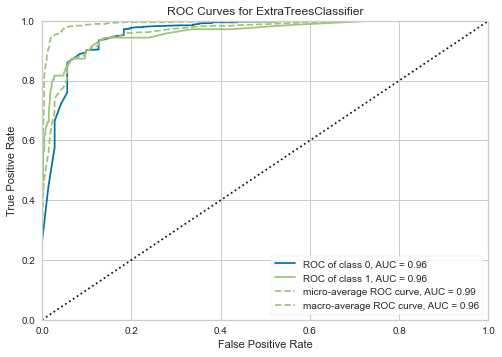

In [22]:
plot_model(et, plot = 'auc')

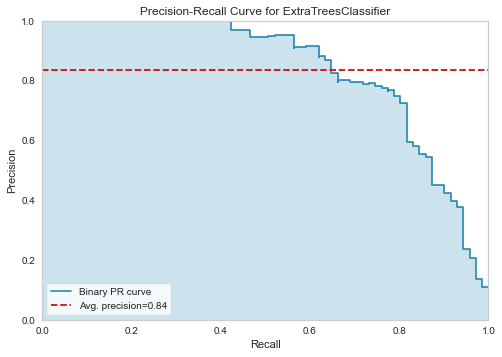

In [23]:
plot_model(et, plot = 'pr')

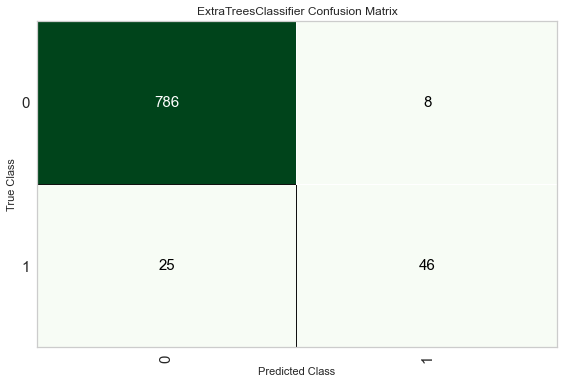

In [24]:
plot_model(et, plot = 'confusion_matrix')

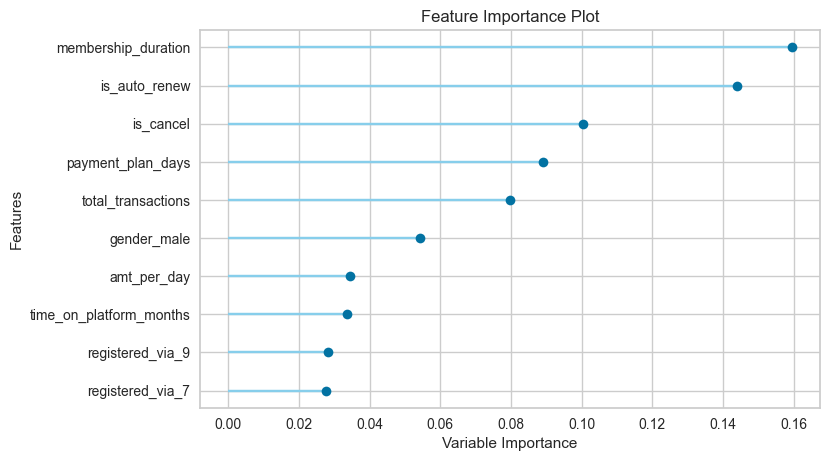

In [25]:
plot_model(et, plot='feature')

In [26]:
predict_model(et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9618,0.9612,0.6479,0.8519,0.7360,0.7158,0.7236


## Modeling

In [ ]:
# Intergate MLFLow 

In [27]:
pd.set_option('display.max_columns', None)

In [28]:
dataset.head()

,msno,city,bd,gender,registered_via,total_transactions,total_activity,time_on_platform_months,is_churn,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,discount,is_discount,amt_per_day,membership_duration
0,MhdcuDCdotOcBHILuXSkXy9XDls0DEXdXXZJL9SCOig=,9,28,female,9,1.0,21.0,152,0,5.285714,1.000000,0.714286,1.047619,12.809524,9.904762,3526.196429,31.0,30.0,149.0,149.0,1.0,0.0,0.0,0.0,4.966667,30.0
1,aXSvQJPCxtCnyte5PsCp1vsTbEJUFRqRJWo5hoZwwZE=,10,17,female,9,1.0,30.0,16,0,14.666667,6.566667,3.466667,2.533333,26.566667,39.400000,7551.235200,38.0,30.0,149.0,149.0,0.0,0.0,0.0,0.0,4.966667,30.0
2,LYFouVJ6ZW04vOFBFE0lK1YLIjZh/KiMYaC26NlCsMI=,15,23,female,3,1.0,29.0,50,0,17.517241,2.241379,1.172414,1.379310,48.275862,53.965517,12071.774207,38.0,30.0,149.0,149.0,0.0,0.0,0.0,0.0,4.966667,30.0
3,8egXDUwo4/JNATDiTG8up/488e3pqcr0IuETIn9YzwM=,13,28,male,9,1.0,8.0,83,0,2.375000,0.750000,0.375000,0.500000,11.875000,12.125000,3134.137500,31.0,30.0,149.0,149.0,1.0,0.0,0.0,0.0,4.966667,30.0
4,+pD/roeHBNarktkCoINadqAXeKwohmQAbroyQkOQx34=,5,17,male,3,2.0,28.0,61,0,2.928571,1.464286,1.107143,0.857143,46.357143,38.928571,10937.940536,21.0,30.0,149.0,149.0,1.0,0.0,0.0,0.0,4.966667,60.5


In [29]:
dataset['gender'] = dataset['gender'].map({'female':1,'male':0})

In [30]:
dataset.head()

,msno,city,bd,gender,registered_via,total_transactions,total_activity,time_on_platform_months,is_churn,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,discount,is_discount,amt_per_day,membership_duration
0,MhdcuDCdotOcBHILuXSkXy9XDls0DEXdXXZJL9SCOig=,9,28,1,9,1.0,21.0,152,0,5.285714,1.000000,0.714286,1.047619,12.809524,9.904762,3526.196429,31.0,30.0,149.0,149.0,1.0,0.0,0.0,0.0,4.966667,30.0
1,aXSvQJPCxtCnyte5PsCp1vsTbEJUFRqRJWo5hoZwwZE=,10,17,1,9,1.0,30.0,16,0,14.666667,6.566667,3.466667,2.533333,26.566667,39.400000,7551.235200,38.0,30.0,149.0,149.0,0.0,0.0,0.0,0.0,4.966667,30.0
2,LYFouVJ6ZW04vOFBFE0lK1YLIjZh/KiMYaC26NlCsMI=,15,23,1,3,1.0,29.0,50,0,17.517241,2.241379,1.172414,1.379310,48.275862,53.965517,12071.774207,38.0,30.0,149.0,149.0,0.0,0.0,0.0,0.0,4.966667,30.0
3,8egXDUwo4/JNATDiTG8up/488e3pqcr0IuETIn9YzwM=,13,28,0,9,1.0,8.0,83,0,2.375000,0.750000,0.375000,0.500000,11.875000,12.125000,3134.137500,31.0,30.0,149.0,149.0,1.0,0.0,0.0,0.0,4.966667,30.0
4,+pD/roeHBNarktkCoINadqAXeKwohmQAbroyQkOQx34=,5,17,0,3,2.0,28.0,61,0,2.928571,1.464286,1.107143,0.857143,46.357143,38.928571,10937.940536,21.0,30.0,149.0,149.0,1.0,0.0,0.0,0.0,4.966667,60.5


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3032 entries, 0 to 3031
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   msno                     3032 non-null   object 
 1   city                     3032 non-null   int64  
 2   bd                       3032 non-null   int64  
 3   gender                   3032 non-null   int64  
 4   registered_via           3032 non-null   int64  
 5   total_transactions       3032 non-null   float64
 6   total_activity           3032 non-null   float64
 7   time_on_platform_months  3032 non-null   int64  
 8   is_churn                 3032 non-null   int64  
 9   num_25                   3032 non-null   float64
 10  num_50                   3032 non-null   float64
 11  num_75                   3032 non-null   float64
 12  num_985                  3032 non-null   float64
 13  num_100                  3032 non-null   float64
 14  num_unq                 

In [43]:
dataset = dataset.replace([np.inf, -np.inf], 0)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_subset_v01 = dataset.drop(['msno','is_churn'],axis=1)
scaler.fit(dataset_subset_v01)
dataset_scaled = pd.DataFrame(scaler.transform(dataset_subset_v01),columns = dataset_subset_v01.columns)
dataset_scaled_final = pd.concat([dataset_scaled,dataset[['msno','is_churn']]],axis=1)

In [45]:
dataset_scaled_final.head()

,city,bd,gender,registered_via,total_transactions,total_activity,time_on_platform_months,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,discount,is_discount,amt_per_day,membership_duration,msno,is_churn
0,-0.302422,-0.068381,1.054239,0.836927,-0.296619,0.148803,2.195479,-0.040601,-0.241884,-0.187408,0.037588,-0.539816,-0.791053,-0.560469,-1.453872,-0.167181,-0.155859,-0.152037,0.440978,-0.163939,-0.071599,-0.07517,0.117615,-0.231373,MhdcuDCdotOcBHILuXSkXy9XDls0DEXdXXZJL9SCOig=,0
1,-0.133276,-0.586710,1.054239,0.836927,-0.296619,1.113302,-1.103059,1.500272,2.937222,3.111564,0.929461,-0.071480,0.523875,0.011109,0.204598,-0.167181,-0.155859,-0.152037,-2.291177,-0.163939,-0.071599,-0.07517,0.117615,-0.231373,aXSvQJPCxtCnyte5PsCp1vsTbEJUFRqRJWo5hoZwwZE=,0
2,0.712458,-0.303985,1.054239,-1.557376,-0.296619,1.006135,-0.278424,1.968495,0.467064,0.361699,0.236702,0.667568,1.173221,0.653051,0.204598,-0.167181,-0.155859,-0.152037,-2.291177,-0.163939,-0.071599,-0.07517,0.117615,-0.231373,LYFouVJ6ZW04vOFBFE0lK1YLIjZh/KiMYaC26NlCsMI=,0
3,0.374165,-0.068381,-0.948551,0.836927,-0.296619,-1.244362,0.521956,-0.518702,-0.384658,-0.594072,-0.291148,-0.571630,-0.692072,-0.616143,-1.453872,-0.167181,-0.155859,-0.152037,0.440978,-0.163939,-0.071599,-0.07517,0.117615,-0.231373,8egXDUwo4/JNATDiTG8up/488e3pqcr0IuETIn9YzwM=,0
4,-0.979009,-0.586710,-0.948551,-1.557376,0.680934,0.898969,-0.011631,-0.427774,0.023268,0.283466,-0.076755,0.602249,0.502858,0.492040,-3.823115,-0.167181,-0.155859,-0.152037,0.440978,-0.163939,-0.071599,-0.07517,0.117615,0.276804,+pD/roeHBNarktkCoINadqAXeKwohmQAbroyQkOQx34=,0


<AxesSubplot:>

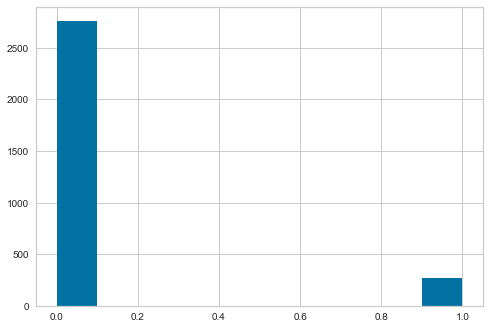

In [46]:
dataset_scaled_final['is_churn'].hist()

In [47]:
dataset_scaled_final_withoutmsno = dataset_scaled_final.drop('msno',axis=1)

In [48]:
X = np.array(dataset_scaled_final_withoutmsno.iloc[:, dataset_scaled_final_withoutmsno.columns != 'is_churn'])
y = np.array(dataset_scaled_final_withoutmsno.iloc[:, dataset_scaled_final_withoutmsno.columns == 'is_churn'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (3032, 24)
Shape of y: (3032, 1)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2425, 24)
Number transactions y_train dataset:  (2425, 1)
Number transactions X_test dataset:  (607, 24)
Number transactions y_test dataset:  (607, 1)


In [50]:
from imblearn.over_sampling import SMOTE # SMOTE synthatically generates that data from a given distribution # this library only works with numerical 
#continous data. For other dta type use different version of SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [216]
Before OverSampling, counts of label '0': [2209] 

After OverSampling, the shape of train_X: (4418, 24)
After OverSampling, the shape of train_y: (4418,) 

After OverSampling, counts of label '1': 2209
After OverSampling, counts of label '0': 2209


In [121]:
import time
from sklearn.metrics import precision_recall_fscore_support as score
model_table = {}

def save_model_metric(model_name,model_type,tune_method, precision, recall, Fscore,model_params):
    timestamp_id = time.time()
    model_table[timestamp_id] = {}
    model_table[timestamp_id]['name_model'] = model_name
    model_table[timestamp_id]['model_type'] = model_type #base or hypertune or stack
    model_table[timestamp_id]['model_tune_method'] = tune_method #grid, random, hyperopt, optuna
    model_table[timestamp_id]['precision'] = precision
    model_table[timestamp_id]['recall'] = recall
    model_table[timestamp_id]['f1Score'] = Fscore
    model_table[timestamp_id]['best_model'] = model_params

In [122]:
%%time
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predict = model.predict(X_test)
print(classification_report(y_test, predict))
precision,recall,fscore,support=score(y_test, predict,average='binary')
save_model_metric("logistic_base","base","base", precision, recall, fscore,model)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       551
           1       0.81      0.52      0.63        56

    accuracy                           0.94       607
   macro avg       0.88      0.75      0.80       607
weighted avg       0.94      0.94      0.94       607

CPU times: user 48.3 ms, sys: 398 ms, total: 446 ms
Wall time: 77.6 ms


In [123]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Base Model ---> Model without any parameter 
model = RandomForestClassifier(random_state= 101).fit(X_train,y_train)
predictionforest = model.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
precision,recall,fscore,support=score(y_test, predictionforest,average='binary')
save_model_metric("RandomForest_base","base","base", precision, recall, fscore,model)

[[547   4]
 [ 14  42]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       551
           1       0.91      0.75      0.82        56

    accuracy                           0.97       607
   macro avg       0.94      0.87      0.90       607
weighted avg       0.97      0.97      0.97       607

0.9703459637561779


In [124]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Base Model ---> Model without any parameter 
model = DecisionTreeClassifier(random_state=102).fit(X_train,y_train)
predictiondtree = model.predict(X_test)
print(confusion_matrix(y_test,predictiondtree))
print(classification_report(y_test,predictiondtree))
print(accuracy_score(y_test,predictiondtree))
precision,recall,fscore,support=score(y_test, predictiondtree,average='binary')
save_model_metric("DTree_base","base","base", precision, recall, fscore,model)

[[540  11]
 [ 11  45]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       551
           1       0.80      0.80      0.80        56

    accuracy                           0.96       607
   macro avg       0.89      0.89      0.89       607
weighted avg       0.96      0.96      0.96       607

0.9637561779242174


In [125]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Base Model ---> Model without any parameter 
model = ExtraTreesClassifier(random_state=102).fit(X_train,y_train)
predictiondtree = model.predict(X_test)
print(confusion_matrix(y_test,predictiondtree))
print(classification_report(y_test,predictiondtree))
print(accuracy_score(y_test,predictiondtree))
precision,recall,fscore,support=score(y_test, predictiondtree,average='binary')
save_model_metric("ETree_base","base","base", precision, recall, fscore,model)

[[548   3]
 [ 18  38]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       551
           1       0.93      0.68      0.78        56

    accuracy                           0.97       607
   macro avg       0.95      0.84      0.88       607
weighted avg       0.96      0.97      0.96       607

0.9654036243822076


In [126]:
pd.DataFrame(model_table).T

,name_model,model_type,model_tune_method,precision,recall,f1Score,best_model
1.655210e+09,logistic_base,base,base,0.805556,0.517857,0.630435,"LogisticRegression(C=1.0, class_weight=None, d..."
1.655210e+09,RandomForest_base,base,base,0.913043,0.75,0.823529,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
1.655210e+09,DTree_base,base,base,0.803571,0.803571,0.803571,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1.655210e+09,ETree_base,base,base,0.926829,0.678571,0.783505,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig..."


In [127]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,5,10],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [5,10,20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)
precision,recall,fscore,support=score(y_test, predictionforest,average='binary')
save_model_metric("rf_tune01","tune","grid", precision, recall, fscore,model)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:   10.5s


[[545   6]
 [ 14  42]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       551
           1       0.88      0.75      0.81        56

    accuracy                           0.97       607
   macro avg       0.92      0.87      0.89       607
weighted avg       0.97      0.97      0.97       607



[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   14.2s finished


In [57]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [10,20,50],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [10,15,20],
               'n_estimators': [5,10,20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc4 = accuracy_score(y_test,predictionforest)
print(model.best_estimator_)
precision,recall,fscore,support=score(y_test, predictionforest,average='binary')
save_model_metric("rf_tune02","tune","grid", precision, recall, fscore,model)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   14.6s


[[549   2]
 [ 16  40]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       551
           1       0.95      0.71      0.82        56

    accuracy                           0.97       607
   macro avg       0.96      0.86      0.90       607
weighted avg       0.97      0.97      0.97       607

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   15.1s finished


In [129]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,5,10],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [5,10,20,100]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_grid_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1,scoring="precision",return_train_score=True)
model.fit(X_train,y_train)

predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
# acc3 = accuracy_score(y_test,predictionforest)
precision,recall,fscore,support=score(y_test, predictionforest,average='binary')
save_model_metric("rf_tune03","tune","random", precision, recall, fscore,model)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[[550   1]
 [ 29  27]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       551
           1       0.96      0.48      0.64        56

    accuracy                           0.95       607
   macro avg       0.96      0.74      0.81       607
weighted avg       0.95      0.95      0.94       607



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished


In [130]:
random_grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,5,10],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
              }

clf = DecisionTreeClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_grid_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)
predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)
precision,recall,fscore,support=score(y_test, predictionforest,average='binary')
save_model_metric("dtree_tune02","tune","random", precision, recall, fscore,model)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[[545   6]
 [ 13  43]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       551
           1       0.88      0.77      0.82        56

    accuracy                           0.97       607
   macro avg       0.93      0.88      0.90       607
weighted avg       0.97      0.97      0.97       607



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [131]:
random_grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,5,10,30],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
                      'n_estimators':[10,50]
              }

clf = ExtraTreesClassifier()
model = GridSearchCV(estimator = clf, param_grid = random_grid_search,
                               cv = 4, verbose= 1, n_jobs = -1)

model.fit(X_train,y_train)
predictionforest = model.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)
precision,recall,fscore,support=score(y_test, predictionforest,average='binary')
save_model_metric("etree_tune01","tune","grid", precision, recall, fscore,model)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   13.4s


[[550   1]
 [ 27  29]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       551
           1       0.97      0.52      0.67        56

    accuracy                           0.95       607
   macro avg       0.96      0.76      0.82       607
weighted avg       0.95      0.95      0.95       607



[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:   19.0s finished


In [ ]:
# Model Stacking 

In [133]:
from sklearn.ensemble import StackingClassifier

estimators = [
('rf', ExtraTreesClassifier(random_state=101)),
('dt', DecisionTreeClassifier(random_state=101)),
]
model_stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model_stack.fit(X_train,y_train)
predictiondtree = model_stack.predict(X_test)
print(confusion_matrix(y_test,predictiondtree))
print(classification_report(y_test,predictiondtree))
print(accuracy_score(y_test,predictiondtree))
precision,recall,fscore,support=score(y_test, predictionforest,average='binary')
save_model_metric("stack_01_base","base","base", precision, recall, fscore,model_stack)

[[546   5]
 [ 17  39]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       551
           1       0.89      0.70      0.78        56

    accuracy                           0.96       607
   macro avg       0.93      0.84      0.88       607
weighted avg       0.96      0.96      0.96       607

0.9637561779242174


In [76]:
random_grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,5,10,30],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
                       # 'n_estimators':[10,50,120,150]
              }

clf = DecisionTreeClassifier()
model_optimize_01 = GridSearchCV(estimator = clf, param_grid = random_grid_search,
                               cv = 5, verbose= 1, n_jobs = -1)
model_optimize_01.fit(X_train,y_train)
predictionforest = model_optimize_01.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


[[540  11]
 [ 15  41]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       551
           1       0.79      0.73      0.76        56

    accuracy                           0.96       607
   macro avg       0.88      0.86      0.87       607
weighted avg       0.96      0.96      0.96       607



[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    1.4s finished


In [77]:
model_optimize_01.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
random_grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,5,10,30],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
                       'n_estimators':[10,50,120,150]
              }

clf = ExtraTreesClassifier()
model_optimize_02 = GridSearchCV(estimator = clf, param_grid = random_grid_search,
                               cv = 5, verbose= 1, n_jobs = -1)
model_optimize_02.fit(X_train,y_train)
predictionforest = model_optimize_02.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.3min


[[550   1]
 [ 25  31]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       551
           1       0.97      0.55      0.70        56

    accuracy                           0.96       607
   macro avg       0.96      0.78      0.84       607
weighted avg       0.96      0.96      0.95       607



[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  1.6min finished


In [79]:
model_optimize_02.best_estimator_

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=30, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [134]:
#stacking two best model
from sklearn.ensemble import StackingClassifier

estimators = [
('model_1',model_optimize_01.best_estimator_ ),
('model_2',model_optimize_02.best_estimator_ ),
]
model_stack= StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model_stack.fit(X_train,y_train)
predictiondtree = model_stack.predict(X_test)
print(confusion_matrix(y_test,predictiondtree))
print(classification_report(y_test,predictiondtree))
print(accuracy_score(y_test,predictiondtree))
precision,recall,fscore,support=score(y_test, predictiondtree,average='binary')
save_model_metric("stack_01_tune","tune","grid", precision, recall, fscore,model_stack)

[[543   8]
 [ 16  40]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       551
           1       0.83      0.71      0.77        56

    accuracy                           0.96       607
   macro avg       0.90      0.85      0.87       607
weighted avg       0.96      0.96      0.96       607

0.9604612850082372


In [135]:
pd.DataFrame(model_table).T

,name_model,model_type,model_tune_method,precision,recall,f1Score,best_model
1.655210e+09,logistic_base,base,base,0.805556,0.517857,0.630435,"LogisticRegression(C=1.0, class_weight=None, d..."
1.655210e+09,RandomForest_base,base,base,0.913043,0.75,0.823529,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
1.655210e+09,DTree_base,base,base,0.803571,0.803571,0.803571,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
1.655210e+09,ETree_base,base,base,0.926829,0.678571,0.783505,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig..."
1.655210e+09,rf_tune01,tune,grid,0.875,0.75,0.807692,"GridSearchCV(cv=4, error_score=nan,\n ..."
1.655210e+09,rf_tune02,tune,grid,0.952381,0.714286,0.816327,"GridSearchCV(cv=4, error_score=nan,\n ..."
1.655210e+09,rf_tune03,tune,random,0.964286,0.482143,0.642857,"RandomizedSearchCV(cv=4, error_score=nan,\n ..."
1.655210e+09,dtree_tune02,tune,random,0.877551,0.767857,0.819048,"RandomizedSearchCV(cv=4, error_score=nan,\n ..."
1.655210e+09,etree_tune01,tune,grid,0.966667,0.517857,0.674419,"GridSearchCV(cv=4, error_score=nan,\n ..."
1.655211e+09,stack_01_base,base,base,0.966667,0.517857,0.674419,"StackingClassifier(cv=None,\n ..."


In [ ]:
#Build Model Report after this 

In [61]:
# #OverFitting Model - Dropping

# from lightgbm import LGBMClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# model = LGBMClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# # fit the model on the whole dataset
# model = LGBMClassifier()
# model.fit(X, y)
# predictionforest = model.predict(X_test)
# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))

[[551   0]
 [  0  56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       551
           1       1.00      1.00      1.00        56

    accuracy                           1.00       607
   macro avg       1.00      1.00      1.00       607
weighted avg       1.00      1.00      1.00       607



In [137]:
# !pip install hyperopt

In [138]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,5,10,50,100],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [5,10,20,50,100]}

In [139]:
# 64GB Ram Machines which are high core (more than 16) ~ more than 3L records 
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 50, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50])
    }

# hp.choice -> For categories 
# hp.quniform -> for interger values 
# hp.uniform -> for float values 

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train,y_train, cv = 5, scoring="precision").mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 50,
            trials= trials)
best

100%|██████████| 50/50 [00:18<00:00,  2.72trial/s, best loss: -0.9749019607843138]


{'criterion': 1,
 'max_depth': 50.0,
 'max_features': 1,
 'min_samples_leaf': 0.007764963708545833,
 'min_samples_split': 0.45475950910615826,
 'n_estimators': 0}

In [140]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 75, 3: 100, 4: 125}

trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]
                                      ).fit(X_train,y_train)
predictionforest = trainedforest.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc5 = accuracy_score(y_test,predictionforest)

[[548   3]
 [ 25  31]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       551
           1       0.91      0.55      0.69        56

    accuracy                           0.95       607
   macro avg       0.93      0.77      0.83       607
weighted avg       0.95      0.95      0.95       607



In [142]:
# !pip install optuna

In [146]:
import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
import optuna

#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        classifier_obj = linear_model.LogisticRegression(C=logreg_c)
    else:
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators
        )

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3,scoring='recall')
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2022-06-14 12:49:15,283] A new study created in memory with name: no-name-bc839a50-e09c-4634-97d9-b1abd2964952
[I 2022-06-14 12:49:15,380] Trial 0 finished with value: 0.5297517297517298 and parameters: {'classifier': 'LogReg', 'logreg_c': 613765.5415246652}. Best is trial 0 with value: 0.5297517297517298.
[I 2022-06-14 12:49:15,423] Trial 1 finished with value: 0.0 and parameters: {'classifier': 'LogReg', 'logreg_c': 2.2465205076794738e-05}. Best is trial 0 with value: 0.5297517297517298.
[I 2022-06-14 12:49:15,463] Trial 2 finished with value: 0.0919006919006919 and parameters: {'classifier': 'LogReg', 'logreg_c': 0.00048708298565179554}. Best is trial 0 with value: 0.5297517297517298.
[I 2022-06-14 12:49:15,563] Trial 3 finished with value: 0.5297517297517298 and parameters: {'classifier': 'LogReg', 'logreg_c': 3031.638254811315}. Best is trial 0 with value: 0.5297517297517298.
[I 2022-06-14 12:49:15,608] Trial 4 finished with value: 0.5113146113146113 and parameters: {'classifie

In [147]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# {'classifier': 'RandomForest', 'rf_n_estimators': 34, 'rf_max_depth': 15}. Best is trial 22 with value: 0.7207163207163206. 
model = RandomForestClassifier(random_state= 101,n_estimators=34,max_depth=15).fit(X_train,y_train)
predictionforest = model.predict(X_test)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
precision,recall,fscore,support=score(y_test, predictionforest,average='binary')
save_model_metric("RandomForest_tune","tune","optuna", precision, recall, fscore,model)

[[548   3]
 [ 13  43]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       551
           1       0.93      0.77      0.84        56

    accuracy                           0.97       607
   macro avg       0.96      0.88      0.91       607
weighted avg       0.97      0.97      0.97       607

0.9736408566721582


In [149]:
# !pip install tpot

In [151]:
from tpot import TPOTClassifier

               
tpot_classifier = TPOTClassifier(generations= 10, population_size= 50, offspring_size= 12,
                                 verbosity= 2, early_stop= 12, 
                                 cv = 4, scoring = 'recall')
tpot_classifier.fit(X_train,y_train) 

Optimization Progress:   0%|          | 0/170 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8194444444444445

Generation 2 - Current best internal CV score: 0.8194444444444445

Generation 3 - Current best internal CV score: 0.8194444444444445

Generation 4 - Current best internal CV score: 0.8194444444444445

Generation 5 - Current best internal CV score: 0.8194444444444445

Generation 6 - Current best internal CV score: 0.8194444444444445

Generation 7 - Current best internal CV score: 0.8240740740740741

Generation 8 - Current best internal CV score: 0.8240740740740741

Generation 9 - Current best internal CV score: 0.8240740740740741

Generation 10 - Current best internal CV score: 0.8240740740740741

Best pipeline: RandomForestClassifier(StandardScaler(SelectPercentile(input_matrix, percentile=54)), bootstrap=False, criterion=gini, max_features=0.7500000000000001, min_samples_leaf=2, min_samples_split=4, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=4,
               disable_update_check=False, early_stop=12, generations=10,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=12,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=None, scoring='recall', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [153]:
from tpot import TPOTClassifier

               
tpot_classifier = TPOTClassifier(generations= 50, population_size= 100, offspring_size= 12,
                                 verbosity= 2, early_stop= 12, 
                                 cv = 4, scoring = 'f1')
tpot_classifier.fit(X_train,y_train) 

Optimization Progress:   0%|          | 0/700 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8155772383983112

Generation 2 - Current best internal CV score: 0.8155772383983112

Generation 3 - Current best internal CV score: 0.8155772383983112

Generation 4 - Current best internal CV score: 0.8155772383983112

Generation 5 - Current best internal CV score: 0.8155772383983112

Generation 6 - Current best internal CV score: 0.8155772383983112

Generation 7 - Current best internal CV score: 0.8155772383983112

Generation 8 - Current best internal CV score: 0.8358584577887833

Generation 9 - Current best internal CV score: 0.8358584577887833

Generation 10 - Current best internal CV score: 0.8358584577887833

Generation 11 - Current best internal CV score: 0.8358584577887833

Generation 12 - Current best internal CV score: 0.8358584577887833

Generation 13 - Current best internal CV score: 0.8358584577887833

Generation 14 - Current best internal CV score: 0.8358584577887833

Generation 15 - Current best internal CV score: 0.835858

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=4,
               disable_update_check=False, early_stop=12, generations=50,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=12,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=None, scoring='f1', subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
from tpot import TPOTClassifier

parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto'],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': [10]}
               

              # the more generations you have the more populations you have - chances of getting better models. 
tpot_classifier = TPOTClassifier(generations= 4, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 4, scoring = 'precision')
tpot_classifier.fit(X_train,y_train) 